In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
np.random.seed(0)

In [120]:
dogs_wisker_lenght=np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index=np.random.normal(loc=8,scale=1,size=10)

In [121]:
cats_wisker_lenght=np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)

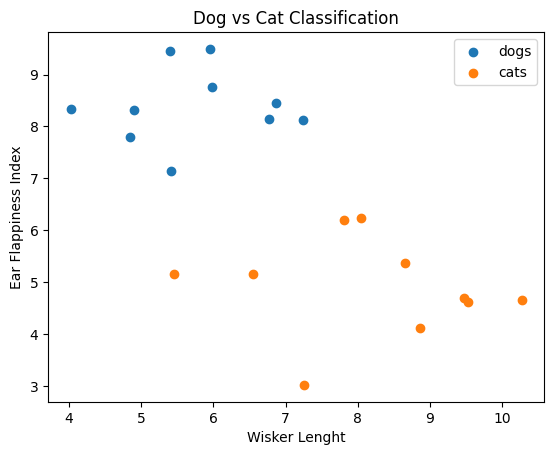

In [122]:
plt.scatter(dogs_wisker_lenght,dogs_ear_flappiness_index,label='dogs')
plt.scatter(cats_wisker_lenght,cats_ear_flappiness_index,label='cats')
plt.xlabel("Wisker Lenght")
plt.ylabel("Ear Flappiness Index")
plt.title("Dog vs Cat Classification")
plt.legend()
plt.show()


In [123]:
def random_liner_classification(data_dogs,data_cats,k,d):
    best_error=float("inf")
    best_teta=None
    best_teta0=None

    for _ in range(k):
        teta=np.random.normal(size=d)
        teta0=np.random.normal()
        
        error=compute_error(data_dogs,data_cats,teta,teta0)
        if error < best_error:
            best_error=error
            best_teta=teta
            best_teta0=teta0
    return best_teta , best_teta0,best_error


In [124]:
def compute_error(data_dogs,data_cats,teta,teta0):
    error=0
    for x_dog in data_dogs:
        if np.dot(teta,x_dog)+teta0 <=0:
            error+=1
    for x_cat in data_cats:
        if np.dot(teta,x_cat)+teta0 >0:
            error+=1
    return error

In [125]:
data_dogs=np.vstack((dogs_wisker_lenght,dogs_ear_flappiness_index)).T
data_cats=np.vstack((cats_wisker_lenght,cats_ear_flappiness_index)).T

In [126]:
k=100
d=2
best_teta,best_teta0,err=random_liner_classification(data_dogs,data_cats,k,d)

In [127]:
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_teta [0] / best_teta[1]) * x_vals - (best_teta0 / best_teta[1])

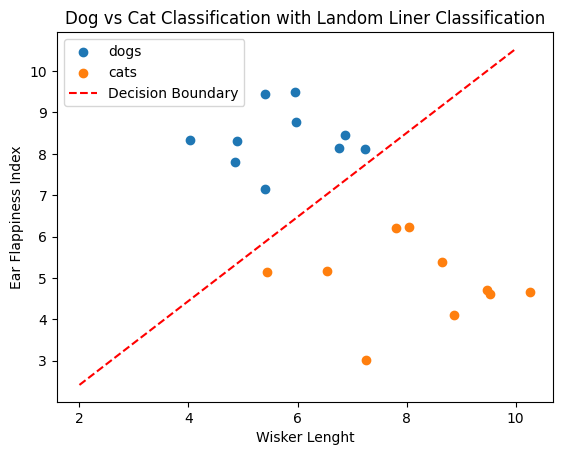

In [128]:
plt.scatter(dogs_wisker_lenght,dogs_ear_flappiness_index,label='dogs')
plt.scatter(cats_wisker_lenght,cats_ear_flappiness_index,label='cats')
plt.plot(x_vals,y_vals,color='red',linestyle='--',label='Decision Boundary')
plt.xlabel("Wisker Lenght")
plt.ylabel("Ear Flappiness Index")
plt.title("Dog vs Cat Classification with Landom Liner Classification")
plt.legend()
plt.show()


In [129]:
data=np.vstack((data_dogs,data_cats))
labels=np.hstack((np.zeros(len(data_dogs)),np.ones(len(data_cats))))

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)


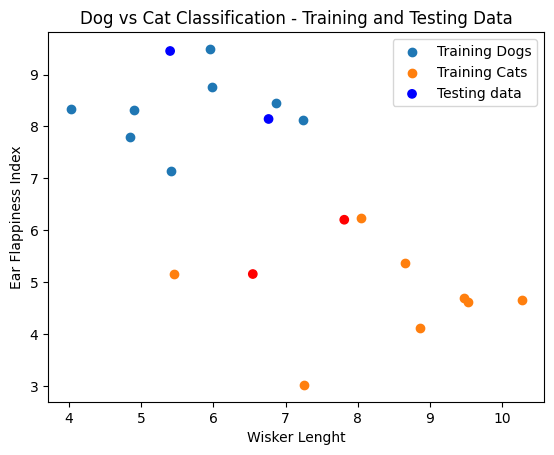

In [131]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],label='Training Dogs')
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],label='Training Cats')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='bwr',label="Testing data")
plt.xlabel("Wisker Lenght")
plt.ylabel("Ear Flappiness Index")
plt.title("Dog vs Cat Classification - Training and Testing Data")
plt.legend()
plt.show()

In [132]:
k=100
d=2
best_teta_train,best_teta0_train,train_error=random_liner_classification(X_train[y_train==0],X_train[y_train==1],k,d)

In [133]:
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_teta_train[0] / best_teta_train[1]) * x_vals_train - (best_teta0_train / best_teta_train[1])

In [134]:
print("best_teta_train:", best_teta_train)
print("best_teta0_train:", best_teta0_train)
print("X_train[:, 0] range:", X_train[:, 0].min(), "-", X_train[:, 0].max())
print("X_train[:, 1] range:", X_train[:, 1].min(), "-", X_train[:, 1].max())

best_teta_train: [-1.17915793  1.30142807]
best_teta0_train: 0.8952602728899299
X_train[:, 0] range: 4.022722120123589 - 10.269754623987607
X_train[:, 1] range: 3.019203531776073 - 9.494079073157605


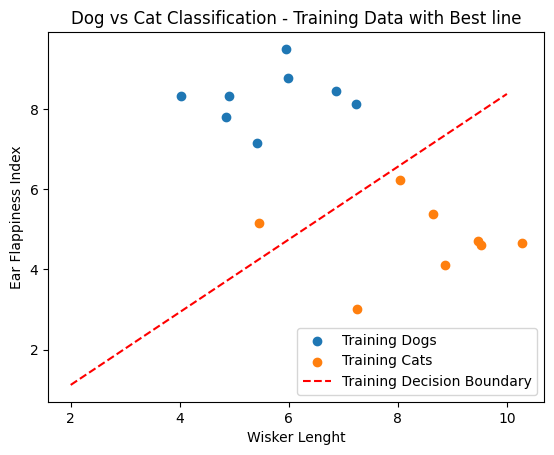

In [135]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],label='Training Dogs')
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],label='Training Cats')
plt.plot(x_vals_train,y_vals_train,color='red',linestyle='--',label="Training Decision Boundary")
# plt.xlim([2,10])
# plt.ylim([2,10])
plt.xlabel("Wisker Lenght")
plt.ylabel("Ear Flappiness Index")
plt.title("Dog vs Cat Classification - Training Data with Best line")
plt.legend()
plt.show()

In [138]:
print(f"Trainig Error: {train_error}")

Trainig Error: 1


In [139]:
test_error=compute_error(X_test[y_test==0],X_test[y_test==1],best_teta_train,best_teta0_train)
print(f"Testig Error: {test_error}")


Testig Error: 0


<function matplotlib.pyplot.show(close=None, block=None)>

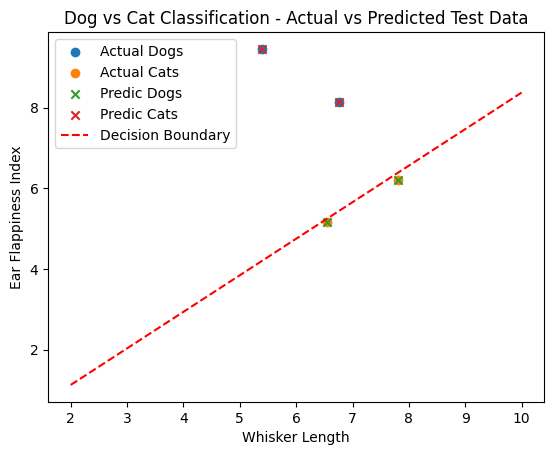

In [142]:
# Plot the actual test data and predicted test data
plt.scatter(X_test[y_test == 0][:, 0], X_test [y_test == 0][:, 1], label='Actual Dogs') 
plt.scatter(X_test[y_test==1][:, 0], X_test [y_test==1][:, 1], label='Actual Cats')
# Predict test data points using the decision boundary 
predicted_labels = np.zeros_like(y_test)
for i, x_test in enumerate(X_test):
    if np.dot (best_teta_train, x_test) + best_teta0_train > 0:
        predicted_labels [i] = 1
x_vals_test = np.linspace(2, 10, 100)
y_vals_test = (-best_teta_train[0] / best_teta_train[1]) * x_vals_test - (best_teta0_train / best_teta_train[1])

# Plot predicted test data points
plt.scatter(X_test [predicted_labels == 0][:, 0], X_test[predicted_labels == 0][:, 1], marker='x', label='Predic Dogs')
plt.scatter(X_test[predicted_labels==1][:, 0], X_test[predicted_labels==1][:, 1], marker='x', label='Predic Cats')
# Plot decision boundary
plt.plot(x_vals_test, y_vals_test, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Actual vs Predicted Test Data')
plt.legend()
plt.show

In [145]:
from sklearn.model_selection import KFold
# Define function for k-fold cross-validation 
def cross_validate(data_dogs, data_cats, k_values, d, n_splits=5): 
    avg_errors = [] 
    kf=KFold(n_splits=n_splits, shuffle=True, random_state=42) 
    for k in k_values: 
        errors = [] 
        for train_index, val_index in kf.split(data_dogs): 
            X_train_fold = np.vstack((data_dogs [train_index], data_cats [train_index])) 
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index)))) 
            X_val_fold = np.vstack((data_dogs [val_index], data_cats [val_index])) 
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index)))) 
            best_theta_fold, best_theta0_fold, error= random_liner_classification(X_train_fold [y_train_fold == 0] ,
                                                                                X_train_fold[y_train_fold == 1],
                                                                                k, d) 
            errors.append(compute_error(X_val_fold[y_val_fold == 0], X_val_fold[y_val_fold == 1], best_theta_fold, best_theta0_fold)) 
        avg_errors.append(np.mean(errors)) 
    best_k=k_values [np.argmin(avg_errors)] 
    return best_k 
#Define k values to try 
k_values = [1, 10, 50, 100, 200,350] 
best_k= cross_validate(data_dogs, data_cats, k_values, d=2) 
print(f"Best value of k:{best_k}") 



Best value of k:100
